In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f = np.load('f.npy')
f.shape

(300, 100, 100)

In [5]:
f[0,0, :]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

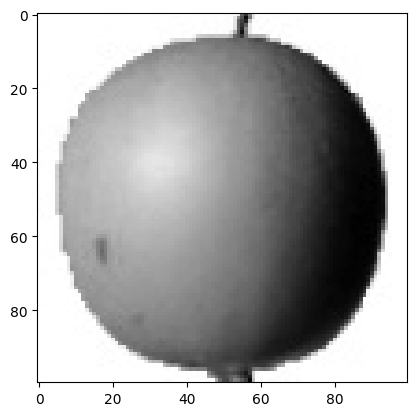

In [8]:
plt.imshow(f[0],cmap='gray_r')
plt.show()

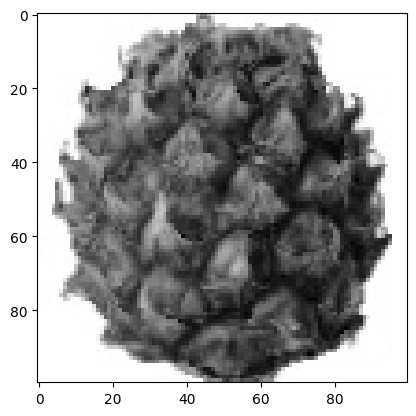

In [9]:
plt.imshow(f[100],cmap='gray_r')
plt.show()

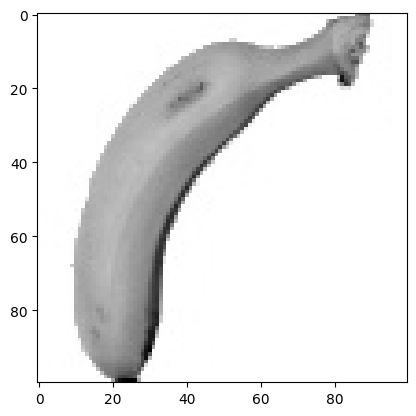

In [11]:
plt.imshow(f[210],cmap='gray_r')
plt.show()

샘플 차원 변경

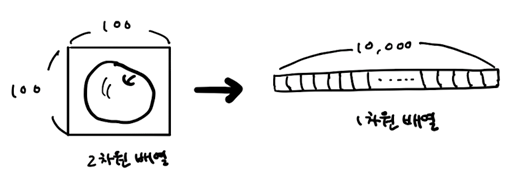

In [13]:
apple = f[:100].reshape(-1,100*100)  # (100,100,100)
pineapple = f[100:200].reshape(100,-1)
banana = f[200:].reshape(100,100*100)

In [17]:
temp = np.array([1,2,3,4,5,6,7,8,9,10])
temp.reshape(2,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [18]:
apple.shape

(100, 10000)

In [27]:
def showImage(imgdata):
  for idx, img in  enumerate(imgdata):
    plt.subplot(10,10,idx+1)
    plt.imshow(img.reshape(100,100),cmap='gray_r')
    plt.axis('off')

  plt.show()

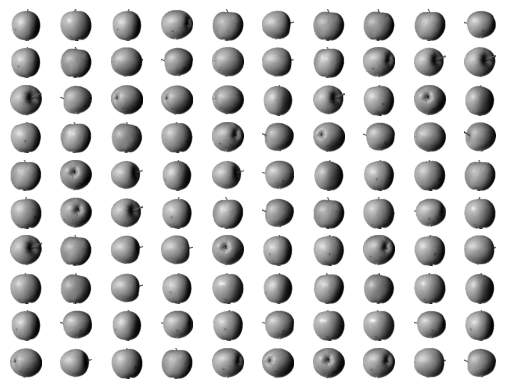

In [28]:
showImage(apple)

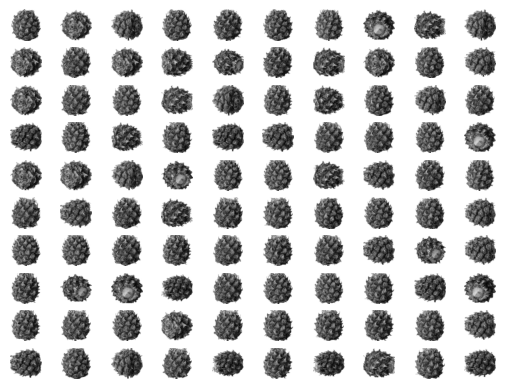

In [29]:
showImage(pineapple)

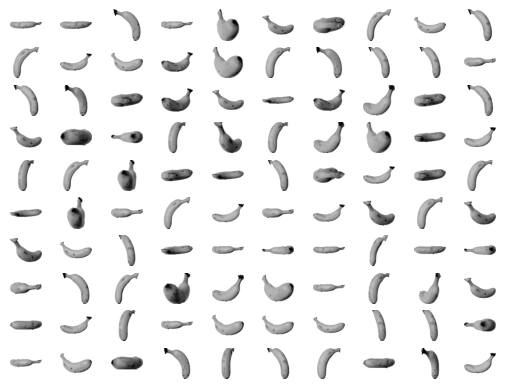

In [30]:
showImage(banana)

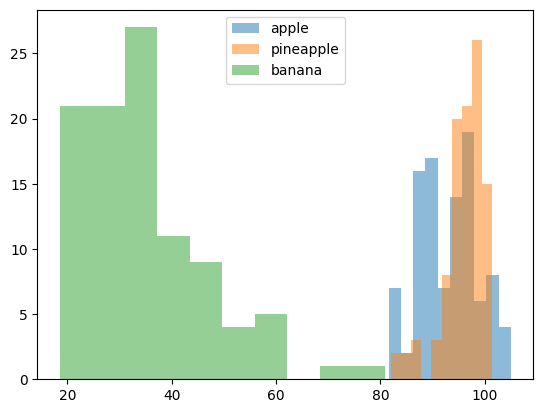

In [41]:
# 이미지 전체에 대한 픽셀의 평균값들의 분포
import numpy as np
plt.hist(np.mean(apple,axis=1), alpha = 0.5,label = 'apple')
plt.hist(np.mean(pineapple,axis=1),alpha = 0.5, label = 'pineapple')
plt.hist(np.mean(banana,axis=1),alpha = 0.5, label='banana')
plt.legend()
plt.show()

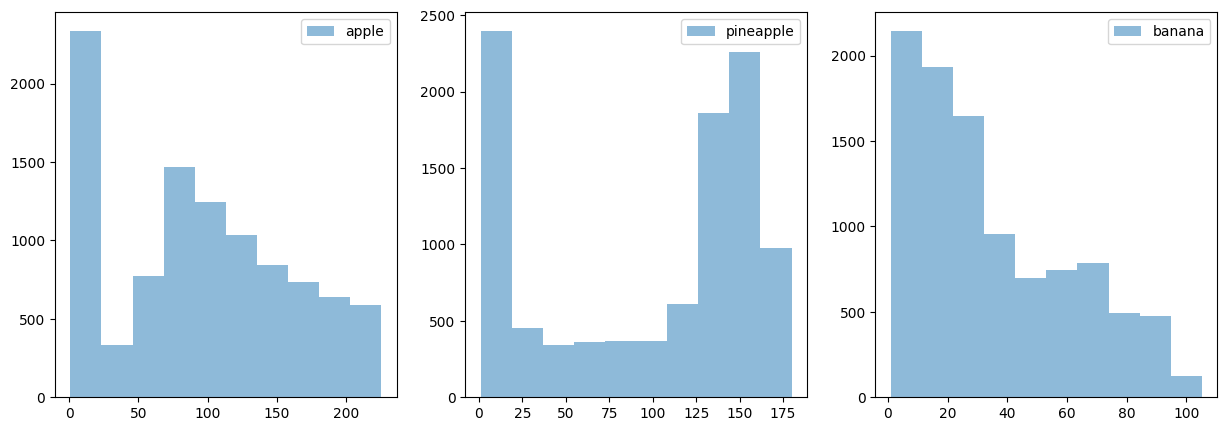

In [46]:
# 이미지 를 이루는 각 픽셀의  평균값들의 분포
import numpy as np
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(np.mean(apple,axis=0), alpha = 0.5,label = 'apple')
plt.legend()

plt.subplot(1,3,2)
plt.hist(np.mean(pineapple,axis=0),alpha = 0.5, label = 'pineapple')
plt.legend()

plt.subplot(1,3,3)
plt.hist(np.mean(banana,axis=0),alpha = 0.5, label='banana')
plt.legend()
plt.show()

각 이미지의 픽셀 평균값으로 하나의 이미지를 *그려보자*

In [53]:
def meanImage(imgdata):
  imgdata_mean =  np.mean(imgdata, axis=0)
  plt.imshow(imgdata_mean.reshape(100,100), cmap='gray_r')
  plt.axis('off')
  plt.show()
  return imgdata_mean

In [62]:
# 전체데이터에서(픽셀) - 파인애플의(픽셀) 평균값을 빼면 오차가 발생
# 오차가 적을 수록 파인애플일 확률이 높다.
# 그래서 오차별로 정렬을 하고 오차가 작은 순서대로 100개를 추출하면
# 평균 이미지정보와 유사한 이미지들만 추출

In [88]:
def findImage(imagedata):
  image_mean = meanImage(imagedata)
  print(image_mean.shape)
  mean_f =  (f - image_mean.reshape(100,100))
  mean_2 = np.mean(mean_f,axis=(1,2))
  indexes = np.argsort(mean_2)
  showImage( f[indexes[:100]].reshape(-1,100*100) )

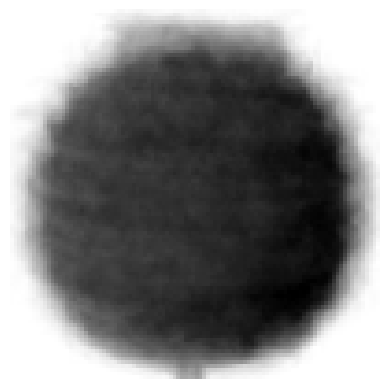

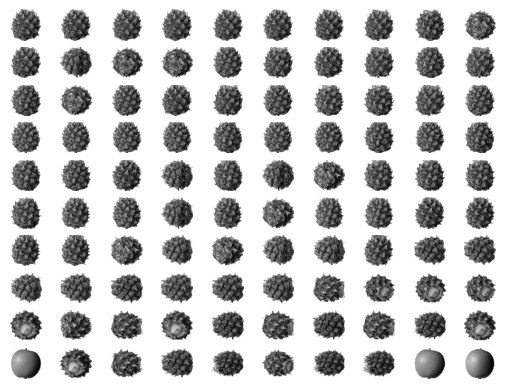

In [110]:
m = meanImage(pineapple)
f_diff = np.abs(f - m.reshape(100,100))
diff_mean = np.mean(f_diff, axis=(1,2))
find_indexs = np.argsort(diff_mean)[:100]
showImage(f[find_indexs])

군집
  - k 평균


  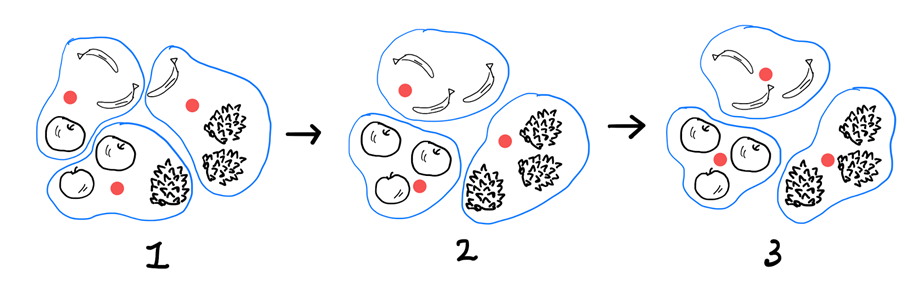

In [112]:
f = np.load('f.npy')
print(f.shape)
f = f.reshape(300,-1)
print(f.shape)

(300, 100, 100)
(300, 10000)


In [114]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [115]:
km.fit(f)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [116]:
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

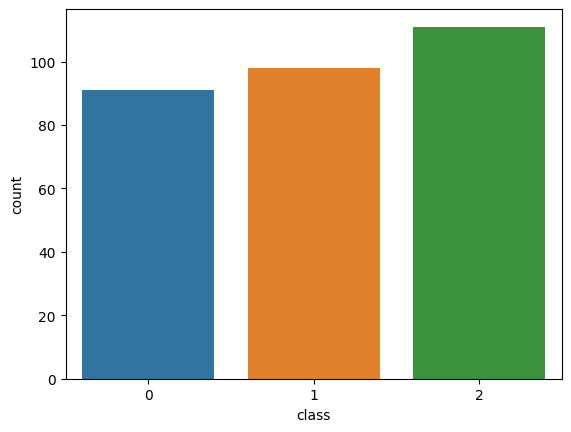

In [118]:
import seaborn as sns
import pandas as pd
sns.countplot(data = pd.DataFrame(km.labels_,columns=['class']),x='class' )
plt.show()

In [124]:
# 머신러닝이 분류한 클래스들의 실제 이미지를 시각화
# 클래스가 0으로 분류한 실제 이미지
index_0 = np.where(km.labels_ == 0)[0]
index_1 = np.where(km.labels_ == 1)[0]
index_2 = np.where(km.labels_ == 2)[0]

In [139]:
index_0

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93,
       94, 95, 96, 97, 98, 99])

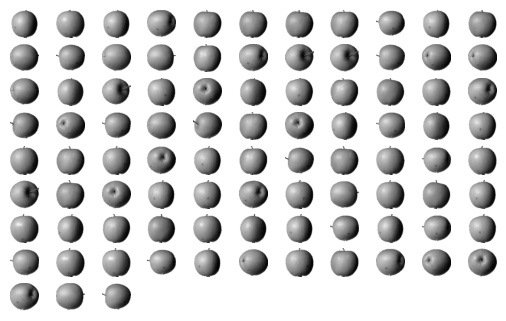

In [141]:
for idx, img_idx in enumerate( index_0 ):
  plt.subplot(11,11, idx+1)
  plt.imshow(f[img_idx].reshape(100,100),cmap='gray_r')
  plt.axis('off')

plt.show()


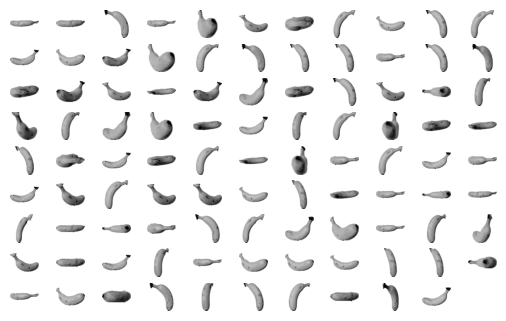

In [142]:
for idx, img_idx in enumerate( index_1 ):
  plt.subplot(11,11, idx+1)
  plt.imshow(f[img_idx].reshape(100,100),cmap='gray_r')
  plt.axis('off')

plt.show()

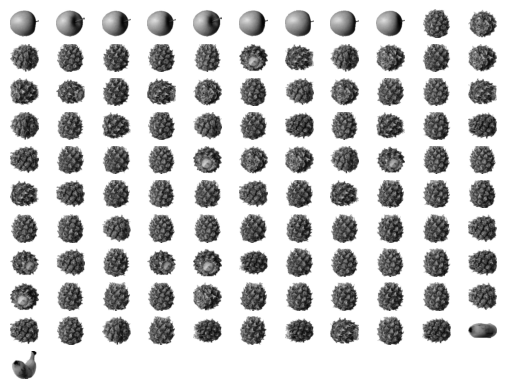

In [143]:
for idx, img_idx in enumerate( index_2 ):
  plt.subplot(11,11, idx+1)
  plt.imshow(f[img_idx].reshape(100,100),cmap='gray_r')
  plt.axis('off')

plt.show()

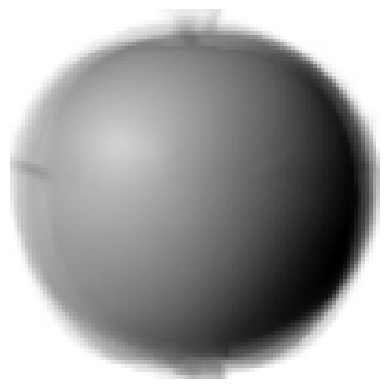

In [146]:
plt.imshow(km.cluster_centers_[0].reshape(100,100), cmap='gray_r')
plt.axis('off')
plt.show()

In [149]:
km.inertia_ # 실제데이터와 클러스터의 중심점과의 차이의 제곱
np.sqrt(km.inertia_), km.inertia_

(71238.87503384914, 5074977316.088373)

In [150]:
# 최적의 클러스터의 개수를 찾기
# Kmeans의 모델에 n_clusters의 개수를 다양하게 넣어서 inertia_이 값이 갑자기 변하는 구간을 찾으면 된다.
# plot point 함수로 시각화 했을때 꺽기는 부분-- 엘보우..

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

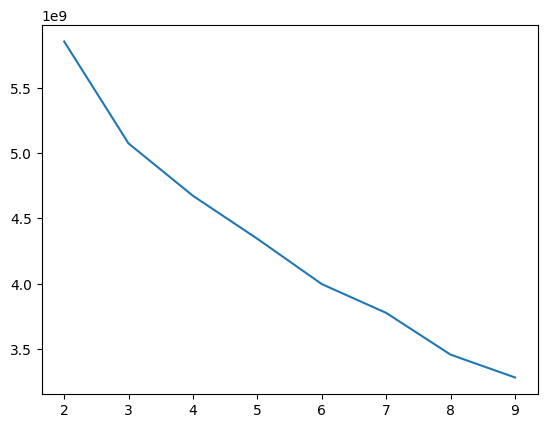

In [151]:
inertia = []
for k in range(2,10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(f)
  inertia.append(km.inertia_)

plt.plot(range(2,10),inertia)
plt.show()